<a href="https://colab.research.google.com/github/Emyfoton/Codigos_pregrado/blob/main/Dinoemy_Ondas(Lugar_para_trabajar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
Azul_Voltaje = np.array([1.077,1.094,1.09,1.136,1.144,1.163,1.182,1.206,1.235,1.289])
Azul_Corriente = np.array([9,8,7,6,5,4,3,2,1,0])
Verde_Voltaje = np.array([0.692,0.705,0.708,0.701,0.699,0.696,0.695,0.691,0.697 ])
Verde_Corriente = np.array([9,8,7,6,5,4,3,2,0])
Amarillo_Voltaje = np.array([0.244,0.265,0.294,0.318,0.337,0.366,0.396,0.428,0.464,0.533])
Amarillo_Corriente = np.array([9,8,7,6,5,4,3,2,1,0])
Rojo_Voltaje = np.array([0.105,0.132,0.161,0.194,0.222,0.252,0.286,0.324,0.365,0.447])
Rojo_Corriente = np.array([9,8,7,6,5,4,3,2,1,0])

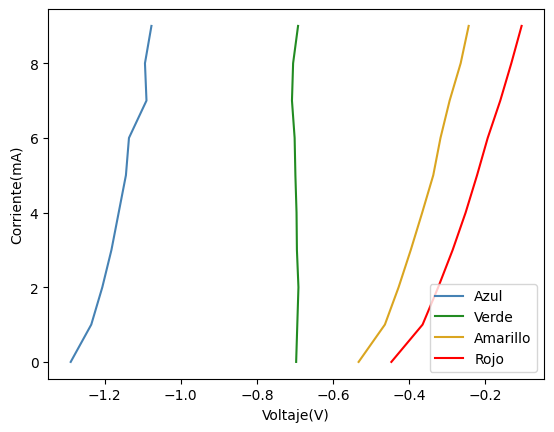

In [ ]:
plt.plot(-Azul_Voltaje, Azul_Corriente, c= "steelblue", label= "Azul")
plt.plot(-Verde_Voltaje, Verde_Corriente, c= "forestgreen", label= "Verde")
plt.plot(-Amarillo_Voltaje, Amarillo_Corriente, c= "goldenrod", label= "Amarillo")
plt.plot(-Rojo_Voltaje, Rojo_Corriente, c= "red", label= "Rojo")
plt.xlabel("Voltaje(V)")
plt.ylabel("Corriente(mA)")
plt.legend()
plt.show()

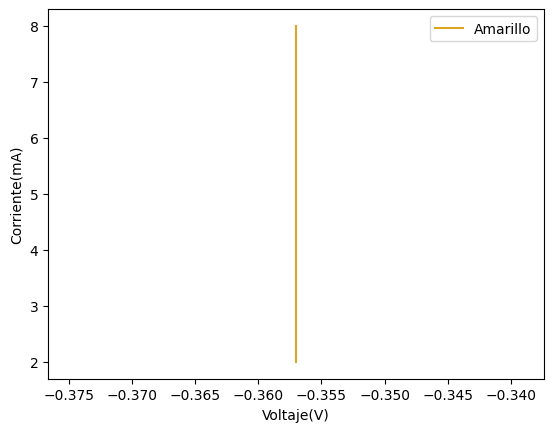

In [ ]:
Amarillo_fijo_V=np.array([0.357, 0.357, 0.357, 0.357])
Amarillo_fijo_I=np.array([2,4,6,8])

plt.plot(-Amarillo_fijo_V, Amarillo_fijo_I, c= "goldenrod", label= "Amarillo")
plt.xlabel("Voltaje(V)")
plt.ylabel("Corriente(mA)")
plt.legend()
plt.show()

In [ ]:
qe= -1.6*10**-19

KmaxA = qe*-Azul_Voltaje[-1]
KmaxY = qe*-Amarillo_Voltaje[-1]
KmaxR = qe*-Rojo_Voltaje[-1]



lA = Quantity(469,'nm')
lY = Quantity(590,'nm')
lR = Quantity(659,'nm')

lA = lA.to('m')
lY = lY.to('m')
lR = lR.to('m')

c = Quantity(300000,'km/s')
c = c.to('m/s')

fA = c/lA
fY = c/lY
fR = c/lR

KmaxA, KmaxY, KmaxR, fA, fY, fR

Kmax=np.array([KmaxA, KmaxY, KmaxR])
f=np.array([fA.magnitude, fY.magnitude, fR.magnitude])

(7.667291597163182e-34,
 -2.8876982739896623e-19,
 1.4850578682000033e-34,
 8.019995104660751e-20)

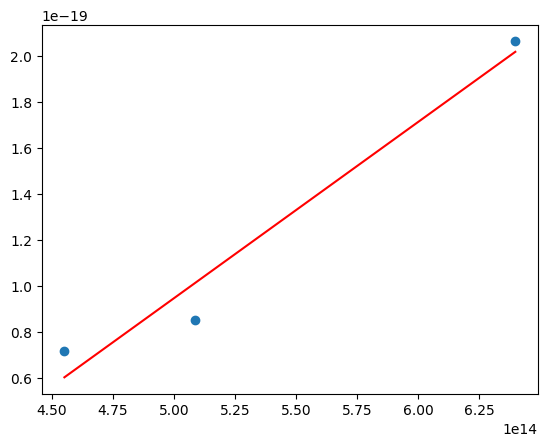

In [ ]:
from logging import error
plt.scatter(f,Kmax)

from scipy.optimize import curve_fit

def modelo_lienal(x,h,phi):
  return h*x + phi


popt, pcov = curve_fit(modelo_lienal, f, Kmax)
h=popt[0]
phi=popt[1]

yplanck = modelo_lienal(f,h,phi)

error_h = np.sqrt(pcov[0,0])
error_phi = np.sqrt(pcov[1,1])

plt.plot(f,yplanck, c="red")
h,phi,error_h,error_phi

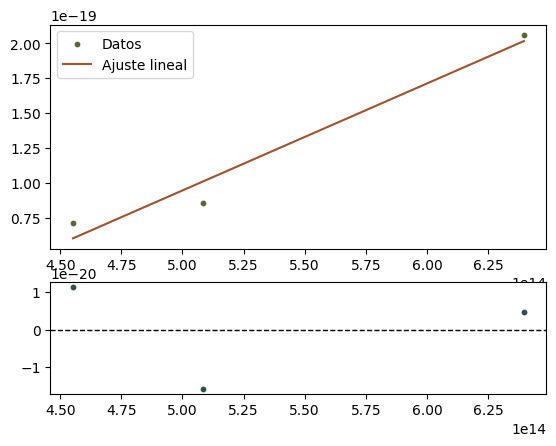

3.209883240645393e-35

In [ ]:
residuales = Kmax - yplanck


fig, ax = plt.subplots(2,1, height_ratios=[1,0.5])

ax[0].scatter(f, Kmax, s=10, c='darkolivegreen', label="Datos")
ax[0].plot(f, yplanck, c='sienna', label="Ajuste lineal")
ax[0].legend()

ax[1].scatter(f, residuales, s=10, c='darkslategray')
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)

plt.show()
residu= np.abs(np.mean(residuales))
residu

In [ ]:
import pandas as pd

datos = {'Color': ['Azul','Amarillo', 'Rojo'], 'Vp (v)': [Azul_Voltaje[-1], Amarillo_Voltaje[-1], Rojo_Voltaje[-1]], 'Lamnda (nm)': [469,590,659], 'f (Hz)': [*f], 'Kmax (J)': [*Kmax] }

df = pd.DataFrame(datos)
df


,Color,Vp (v),Lamnda (nm),f (Hz),Kmax (J)
0,Azul,1.289,469,6.396588e+14,2.062400e-19
1,Amarillo,0.533,590,5.084746e+14,8.528000e-20
2,Rojo,0.447,659,4.552352e+14,7.152000e-20
